In [6]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from geopy.geocoders import Nominatim
from geopy import distance
from geopy.distance import geodesic
import census
import pandas as pd
import geopandas as gpd
import censusdata
import censusgeocode as cg
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import requests

In [7]:
home = pd.read_excel('homegoods-florida.xlsx')
home

,Rank,Name,TotalVisits,lat,lng
0,1,HomeGoods,569734,26.365803,-80.172527
1,2,HomeGoods,522058,28.237780,-80.726972
2,3,HomeGoods,489856,27.794873,-82.729935
3,4,HomeGoods,485955,26.199372,-81.802543
4,5,HomeGoods,477152,28.014127,-82.732060
5,6,HomeGoods,463562,30.192318,-81.549278
6,7,HomeGoods,461838,29.140932,-82.192316
7,8,HomeGoods,455531,26.438459,-80.087514
8,9,HomeGoods,453034,26.009520,-80.297625
9,10,HomeGoods,445372,26.611419,-81.939280


In [8]:
homeDF = pd.DataFrame()
j = 0
for i in  list(range(0,len(home))):
    print(i)
    try:
        CensusGeoData1 = cg.coordinates(x=home.lng[i], y= home.lat[i])
        
    except:
        pass
    
    else:
        homeDF.loc[j, 'Tract']  = CensusGeoData1 ['Census Tracts'][0]['TRACT']
        homeDF.loc[j,'County'] = CensusGeoData1 ['Census Tracts'][0]['COUNTY']
        homeDF.loc[j,'TotalVisits'] = home.TotalVisits[i]
        j = j + 1
    
homeDF.head()        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


,Tract,County,TotalVisits
0,007741,099,569734.0
1,071201,009,522058.0
2,022502,103,489856.0
3,000301,021,485955.0
4,026812,103,477152.0


In [9]:
census = pd.read_excel('Census Data.xlsx')

In [10]:
rent =  pd.read_excel('PropertyTractAverageRent.xlsx')

In [11]:
censusRent = census.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)


In [12]:
censusRent = censusRent.drop(columns=['Unnamed: 0'])

In [16]:
homeDF['Tract'] = homeDF['Tract'].astype(int)
homeDF['County'] = homeDF['County'].astype(int)

In [17]:
censusRentStore = homeDF.merge(
    censusRent,
    "inner",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRentStore['AvgRent'] = censusRentStore['AvgRent'] .fillna(0)
censusRentStore

,Tract,County,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent
0,7741,99,569734.0,156,1077,1069,220,112,132,1077,609,1895,978,2110,2537.000000
1,71201,9,522058.0,730,1738,1828,173,281,190,1738,564,2977,787,2849,2027.666667
2,22502,103,489856.0,160,824,431,208,206,84,824,433,852,910,1374,1232.000000
3,301,21,485955.0,118,1158,476,42,226,223,1158,187,1872,460,2241,0.000000
4,26812,103,477152.0,255,1214,828,287,125,169,1214,741,1766,1132,2057,1855.500000
5,14413,31,463562.0,333,1619,527,182,322,229,1619,610,1851,972,3381,1761.000000
6,2505,83,461838.0,226,1616,1197,163,306,114,1616,536,2540,1069,2931,1761.500000
7,6906,99,455531.0,317,829,1876,511,547,143,829,797,1686,2331,1449,2641.000000
8,110309,11,453034.0,709,1701,1208,516,441,193,1701,811,2086,1873,2794,0.000000
9,10309,71,445372.0,112,1026,1031,405,248,32,1026,533,1685,1180,1837,1453.000000


In [18]:
comp = pd.read_excel('compDF.xlsx')
comp = comp.drop(columns=['Unnamed: 0','NumOfKohl'])
comp

,Tract,County,Store,TotalVists,TotalNumOfCompetitors,TotalCompetitorVisits
0,6303,86,The Home Depot,1654388,1,1654388
1,80500,11,The Home Depot,1589143,1,1589143
2,9014,86,The Home Depot,1507693,1,1507693
3,1607,86,The Home Depot,1485454,1,1485454
4,8810,86,The Home Depot,1482042,1,1482042
...,...,...,...,...,...,...
327,60117,11,Lowes,465875,1,465875
328,17810,95,Lowes,450364,2,1036582
329,16802,95,Lowes,443360,1,443360
330,2737,115,Lowes,430544,1,430544


In [19]:
newDF = pd.DataFrame()
for a in range(0,len(comp)):
    county = comp.County[a]
    countyDF = comp[comp['County'] == county]
    countyDF.reset_index(inplace=True, drop=True)
    
    for b in range(0, len(countyDF)):
        tract = countyDF.Tract[b]
        tractDF = countyDF[countyDF['Tract'] == tract]
        tractDF.reset_index(inplace=True, drop=True)
       
       
        NumOfKohl = 0
        NumOfLowe = 0
      
        NumOfHomeDepot = 0
        
        VisitsOfKohl = 0
        VisitsOfLowe = 0
      
        VisitsOfHomeDepot = 0
        
        
        for i,j in tractDF.iterrows():
                
        
          
                
            if (j['Store'] == 'Kohls'):
                NumOfKohl = NumOfKohl + 1
                VisitsOfKohl = j['TotalVists']
                
            if (j['Store'] == 'Lowes'):
                NumOfLowe = NumOfLowe + 1
                VisitsOfLowe = j['TotalVists']
            
                
            if (j['Store'] == 'The Home Depot'):
                NumOfHomeDepot = NumOfHomeDepot + 1
                VisitsOfHomeDepot = j['TotalVists']
            
        
                
        data = {
                'Tract' : tract,
                'County'  : county,
                'TotalNumOfCompetitors' : tractDF.iloc[0]['TotalNumOfCompetitors'],
                'TotalCompetitorVisits' : tractDF.iloc[0]['TotalCompetitorVisits'],
               
                'NumOfKohl' : NumOfKohl,
                'NumOfLowe' : NumOfLowe,
               
                'NumOfHomeDepot' : NumOfHomeDepot,
                
                'VisitsOfKohl' : VisitsOfKohl,
                'VisitsOfLowe' : VisitsOfLowe,
              
                'VisitsOfHomeDepot' : VisitsOfHomeDepot
                
               }
        data = pd.DataFrame(data, index=[0])
        newDF = pd.concat([newDF, data])

newDF.reset_index(inplace=True, drop=True)
newDF.drop_duplicates(subset=None, keep="first", inplace=True)

In [20]:
trainData = censusRentStore.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

trainData = trainData.fillna(0)
trainData = trainData.drop(columns=['Tract','County'])
trainData

,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,...,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
0,569734.0,156,1077,1069,220,112,132,1077,609,1895,...,2110,2537.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,522058.0,730,1738,1828,173,281,190,1738,564,2977,...,2849,2027.666667,1.0,434068.0,1.0,0.0,0.0,434068.0,0.0,0.0
2,489856.0,160,824,431,208,206,84,824,433,852,...,1374,1232.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,485955.0,118,1158,476,42,226,223,1158,187,1872,...,2241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,477152.0,255,1214,828,287,125,169,1214,741,1766,...,2057,1855.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,463562.0,333,1619,527,182,322,229,1619,610,1851,...,3381,1761.000000,1.0,596556.0,0.0,0.0,1.0,0.0,0.0,596556.0
6,461838.0,226,1616,1197,163,306,114,1616,536,2540,...,2931,1761.500000,2.0,1212207.0,1.0,1.0,0.0,420439.0,791768.0,0.0
7,455531.0,317,829,1876,511,547,143,829,797,1686,...,1449,2641.000000,1.0,844028.0,0.0,0.0,1.0,0.0,0.0,844028.0
8,453034.0,709,1701,1208,516,441,193,1701,811,2086,...,2794,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,445372.0,112,1026,1031,405,248,32,1026,533,1685,...,1837,1453.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Test data 
censusTest = pd.read_excel('Census Data.xlsx')

censusTestRent = censusTest.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

censusTestRent = censusTestRent.drop(columns=['Unnamed: 0'])

testData = censusTestRent.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

testData = testData.fillna(0)
censusRentStoreCopy = censusRentStore
testData = testData[~testData.County.isin(censusRentStoreCopy['County'])]
tractCountyDF = testData[['Tract','County']]
testData = testData.drop(columns=['Tract','County'])
data = testData
testData

,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
15,220,1305,921,245,179,54,1305,1078,1716,1349,1859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,204,702,558,64,71,38,702,913,1102,2322,1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,73,845,567,102,172,38,845,474,871,1055,1286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,110,990,612,235,166,44,990,313,1341,746,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,235,891,335,128,167,37,891,493,942,506,1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,260,1277,802,186,220,18,1277,894,1505,1779,2042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5017,875,2591,542,555,500,216,2591,1055,2015,2019,4876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5018,667,2067,645,541,597,140,2067,1006,1905,1780,3774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5019,469,1477,185,199,448,70,1477,631,916,1482,2603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [24]:
X, y = trainData.iloc[:,1:],trainData.iloc[:,0]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Training score:  0.9999999999998609
RMSE: 67097.07


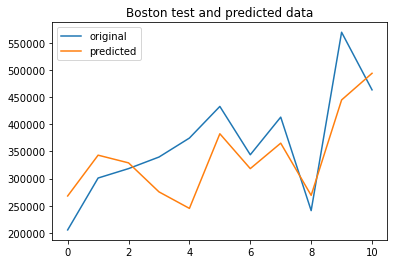

[267956.16 343162.12 328963.38 275517.   245069.81 382616.12 318377.28
 365285.97 269131.4  444929.   494081.28]


In [26]:
from sklearn.model_selection import cross_val_score, KFold
xgbr = xgb.XGBRegressor(verbosity=0) 

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, y_train,cv=10)

ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

preds = xgbr.predict(testData)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.legend()
plt.show()

print(ypred)

In [27]:
predDF = pd.DataFrame(preds)
predDF.columns = ['Score']
predDF.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=True)
tractCountyDF.reset_index(inplace=True, drop=True)

In [28]:
for i in list(range(0,len(data))):
    data.loc[i,'Prediction'] =  predDF.loc[i,'Score']
    data.loc[i, 'Tract'] = tractCountyDF.loc[i,'Tract']
    data.loc[i, 'County'] = tractCountyDF.loc[i,'County']
    
    

In [31]:
data.to_excel('Florida HomeGoods Prediction.xlsx')